In [1]:
%matplotlib inline

# internal
import json

# external
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set(style='whitegrid')

In [2]:
system_info_url = 'http://gbfs.urbansharing.com/bergen-city-bike/system_information.json'
station_info_url = 'http://gbfs.urbansharing.com/bergen-city-bike/station_information.json'
station_status_url = 'http://gbfs.urbansharing.com/bergen-city-bike/station_status.json'

In [3]:
system_info = requests.get(system_info_url).json()

In [4]:
print(json.dumps(system_info, indent=4, ensure_ascii=False))

{
    "last_updated": 1532964420,
    "ttl": 10,
    "data": {
        "id": "bergen-city-bike",
        "language": "nb",
        "name": "Bergen City Bike",
        "operator": "Urban Infrastructure Partner",
        "timezone": "Europe/Oslo",
        "phone_number": "90259737",
        "email": "post@bergenbysykkel.no"
    }
}


In [5]:
station_info = requests.get(station_info_url).json()
# print(json.dumps(station_info, indent=4, ensure_ascii=False))

In [6]:
capacity = sum(x['capacity'] for x in station_info['data']['stations'])
print(f"Capacity (total): {capacity} bikes")

Capacity (total): 654 bikes


In [7]:
bergensere = 254_235 # https://www.ssb.no/befolkning/statistikker/beftett
print(f"Bikes per citizen in Bergen: {capacity/bergensere:.4f}")

Bikes per citizen in Bergen: 0.0026


In [8]:
station_status = requests.get(station_status_url).json()
# print(json.dumps(station_status, indent=4, ensure_ascii=False))

In [9]:
station_ids = [x['station_id'] for x in station_info['data']['stations']]
station_names = [x['name'] for x in station_info['data']['stations']]

stations = {key: val for (key, val) in zip(station_ids, station_names)}

pd.DataFrame.from_dict(stations, orient='index', columns=['Name'])

,Name
223,Rådhuset
222,Sandviken Brygge
221,Sandvikstorget
220,Møllendalsplass
219,Jonsvollkvartalet
217,Nykirken
216,Johanneskirken
215,Nonneseterplass
214,Media City
212,Klosteret


In [10]:
station_names = [stations[x['station_id']] for x in station_status['data']['stations']]
available_bikes = [x['num_bikes_available'] for x in station_status['data']['stations']]
available_docks = [x['num_docks_available'] for x in station_status['data']['stations']]

availability = pd.DataFrame({'Station': station_names, 'Bikes': available_bikes, 'Docks': available_docks})

availability

,Station,Bikes,Docks
0,Rådhuset,4,15
1,Sandviken Brygge,3,7
2,Sandvikstorget,5,14
3,Møllendalsplass,0,16
4,Jonsvollkvartalet,1,18
5,Nykirken,0,10
6,Johanneskirken,1,24
7,Nonneseterplass,10,27
8,Media City,8,11
9,Klosteret,0,21


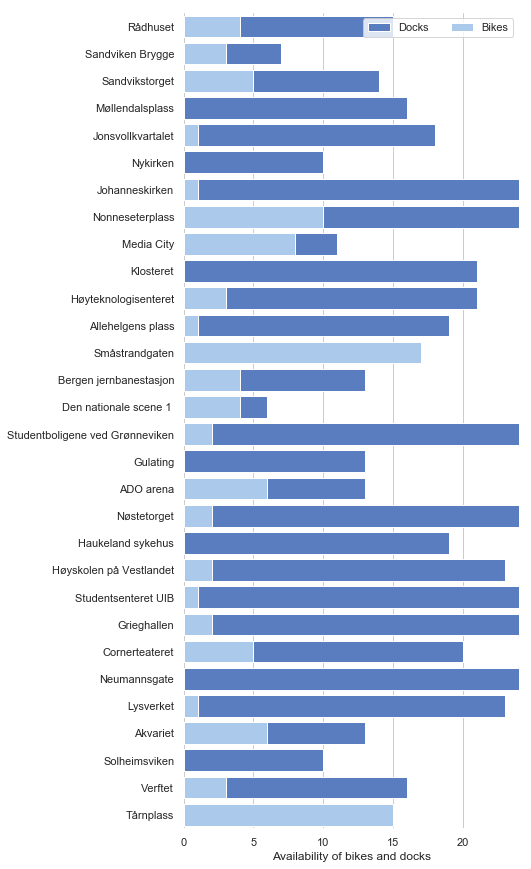

In [11]:
f, ax = plt.subplots(figsize=(6, 15))

sns.set_color_codes("muted")
sns.barplot(x="Docks", y="Station", data=availability, label="Docks", color="b")

sns.set_color_codes("pastel")
sns.barplot(x="Bikes", y="Station", data=availability, label="Bikes", color="b")

ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(0, 24), ylabel="", xlabel="Availability of bikes and docks")
sns.despine(left=True, bottom=True)